In [1]:
from tensorflow import keras
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten
from PIL import Image

In [2]:
import string

letters = dict(zip(list(range(0,26)),string.ascii_lowercase))

In [3]:
ASL_train = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv')
ASL_test = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv')

In [4]:
X_train = ASL_train.drop('label',axis=1)
y_train = ASL_train['label']
X_test = ASL_test.drop('label',axis=1)
y_test = ASL_test['label']

<AxesSubplot:ylabel='Count'>

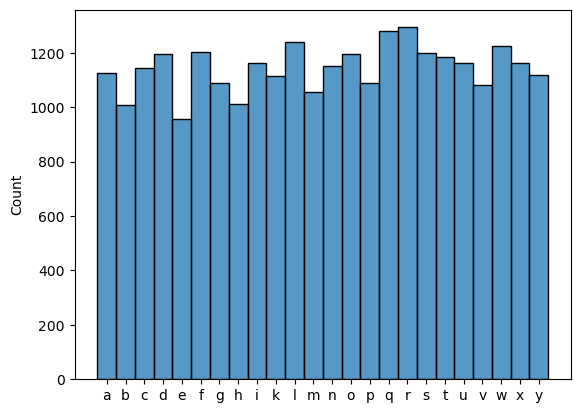

In [5]:
[letters[x] for x in y_train]
y_train_letters = [letters[x] for x in y_train]
y_train_letters.sort()
# np.array(y_train_letters)
sns.histplot(data=y_train_letters)

In [6]:
# y_train = keras.utils.to_categorical(y_train)
# y_test = keras.utils.to_categorical(y_test)

In [7]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [8]:
X_train = X_train.reshape(27455,28,28)
X_test = X_test.reshape(7172,28,28)

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
hh = X_train[5]

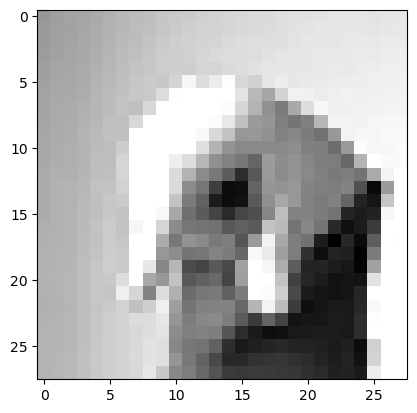

In [11]:
plt.imshow(X_train[5],cmap='gray')

In [12]:
a = X_train[0]*255

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
# para=[{'max_iter':[100,200]}]

logmodel = LogisticRegression(max_iter=200)
# GS = GridSearchCV(estimator=LogisticRegression(), param_grid=para, refit=True, verbose=3)
# logmodel.fit(X_train,y_train)

In [26]:
model = Sequential()

model.add(Conv2D(8, (3,3), activation='relu', input_shape=(28,28,1)))


model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool2D(2,2))



model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPool2D(2,2))





model.add(Flatten())
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.2))          
model.add(Dense(26,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train,y_train, epochs=10, batch_size=100, validation_data=(X_test,y_test))

Epoch 1/10
275/275 [==============================] - 2s 6ms/step - loss: 1.8572 - accuracy: 0.4259 - val_loss: 0.9638 - val_accuracy: 0.7585
Epoch 2/10
275/275 [==============================] - 1s 5ms/step - loss: 0.6217 - accuracy: 0.7892 - val_loss: 0.5644 - val_accuracy: 0.8717
Epoch 3/10
275/275 [==============================] - 2s 6ms/step - loss: 0.3332 - accuracy: 0.8862 - val_loss: 0.3979 - val_accuracy: 0.9050
Epoch 4/10
275/275 [==============================] - 2s 6ms/step - loss: 0.2328 - accuracy: 0.9207 - val_loss: 0.2670 - val_accuracy: 0.9239
Epoch 5/10
275/275 [==============================] - 1s 5ms/step - loss: 0.1709 - accuracy: 0.9428 - val_loss: 0.2445 - val_accuracy: 0.9325
Epoch 6/10
275/275 [==============================] - 1s 5ms/step - loss: 0.1342 - accuracy: 0.9543 - val_loss: 0.2232 - val_accuracy: 0.9281
Epoch 7/10
275/275 [==============================] - 1s 5ms/step - loss: 0.1115 - accuracy: 0.9617 - val_loss: 0.2515 - val_accuracy: 0.9331
Epoch 

In [27]:
model.evaluate(X_test,y_test)

225/225 [==============================] - 1s 3ms/step - loss: 0.1963 - accuracy: 0.9441


[0.19634747505187988, 0.9440881013870239]

In [28]:
model.save('saved_models/model.hdf5')

In [29]:
from sklearn.metrics import accuracy_score
from keras.models import load_model

In [30]:
mod = load_model('saved_models/model.hdf5')

In [31]:
X_test[0].reshape((1,28,28)).shape
mod.predict(X_test[0].reshape((1,28,28)))

1/1 [==============================] - 0s 70ms/step


array([[3.3787231e-12, 1.5076555e-12, 6.1006024e-03, 4.1440267e-12,
        1.1436544e-08, 5.0584986e-05, 9.8179746e-01, 6.4506559e-03,
        3.6342240e-14, 5.5065850e-09, 1.2983530e-11, 4.9772789e-06,
        2.0445945e-12, 6.3360306e-10, 1.3336535e-06, 2.0998689e-06,
        1.2485390e-07, 4.1764633e-13, 3.9665882e-11, 2.1322467e-03,
        1.0918927e-12, 2.0935210e-11, 1.3459581e-13, 3.4599118e-03,
        6.9495172e-08, 1.0067658e-09]], dtype=float32)

1/1 [==============================] - 0s 72ms/step
o


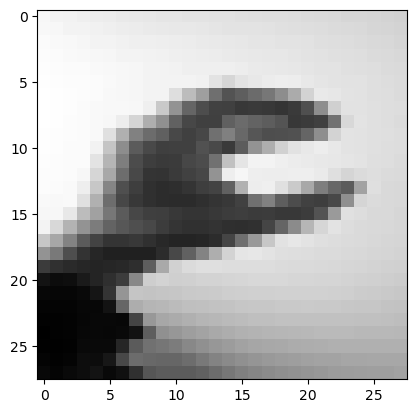

In [32]:
image = Image.open('/kaggle/input/my-own-asl/Images/20230220_084501.jpg')
image = image.resize((28,28))
image = image.convert('L')
image = image.rotate(-90)
image.save('im_thumb.jpg')
pixels = np.array(image.getdata()).reshape((1,28,28))/255
plt.imshow(pixels.reshape((28,28)),cmap='gray')
# print(image.size)
# print(mod.predict(pixels))
my_images_preds = model.predict(pixels)
my_images_preds = np.argmax(my_images_preds)
print(letters[my_images_preds])

In [33]:
a = mod.predict(X_test)

225/225 [==============================] - 0s 2ms/step


In [34]:
preds = [np.argmax(a[x]) for x in range (0,len(a))]
result_letters = [np.argmax(a[x]) for x in range (0,len(a))]
result_letters = [letters[x] for x in result_letters]

accuracy_score(y_test,preds)
# print(letters[result_letters])
# print(f'Model: {[np.argmax(a[x]) for x in range (0,10)]}')
# print(f'''True values:
# {y_test[0:10]}''')

0.9440881204684886